# Model of Antibiotic Susceptibility and Resistance

In [1]:
%matplotlib agg 

from pprint import pprint

from matplotlib import pyplot as plt

## Simplified Model of &beta;-lactam Diffusion, Efflux, and Hydrolysis

### Hydrolysis Process

In [2]:
from ecoli.processes.antibiotics import antibiotic_hydrolysis

The antibiotic hydrolysis process describes the following reaction:

$$ S \leftrightharpoons S_H $$

Let's assume that this follows Michaelis-Menten Kinetics:

$$ v = \frac{k_{cat}[E][S]}{K_M + [S]} $$

By default, we have the following values:

* $K_M = 1 \times 10^{-3}$ mM
* $[E] = 1 \times 10^{-3}$ mM (this is constant)
* $[S]_0 = 1 \times 10^{-3}$ mM
* $k_{cat} = 1$ $s^{-1}$
* $[S_H]_0 = 0$ mM

In [3]:
pprint({
    key: val
    for key, val in antibiotic_hydrolysis.AntibioticHydrolysis.defaults.items()
    if key in ('Km', 'initial_catalyst', 'initial_target_internal', 'kcat')
})

{'Km': <Quantity(0.001, 'millimole / liter')>,
 'initial_catalyst': 0.001,
 'initial_target_internal': 0.001,
 'kcat': <Quantity(1, '1 / second')>}


If we simulate the process for 10 seconds, we get behavior that looks about right:


Simulation ID: 713fb4b8-2948-11ec-ac37-94f6d615b5b6
Created: 10/09/2021 at 17:32:45
Completed in 0.004803 seconds


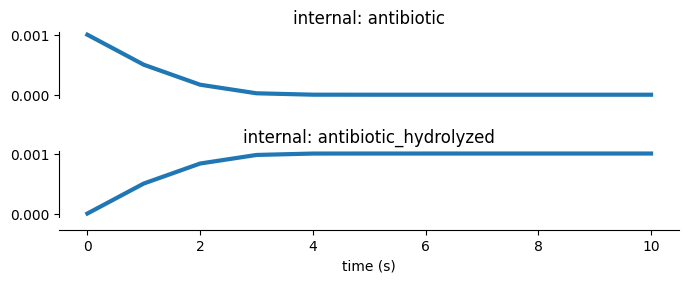

In [4]:
hydrolysis_demo_fig, hydrolysis_demo_data = antibiotic_hydrolysis.demo()
hydrolysis_demo_fig

We can compare the simulated results to what we get from doing the Michaelis-Menten calculations directly:

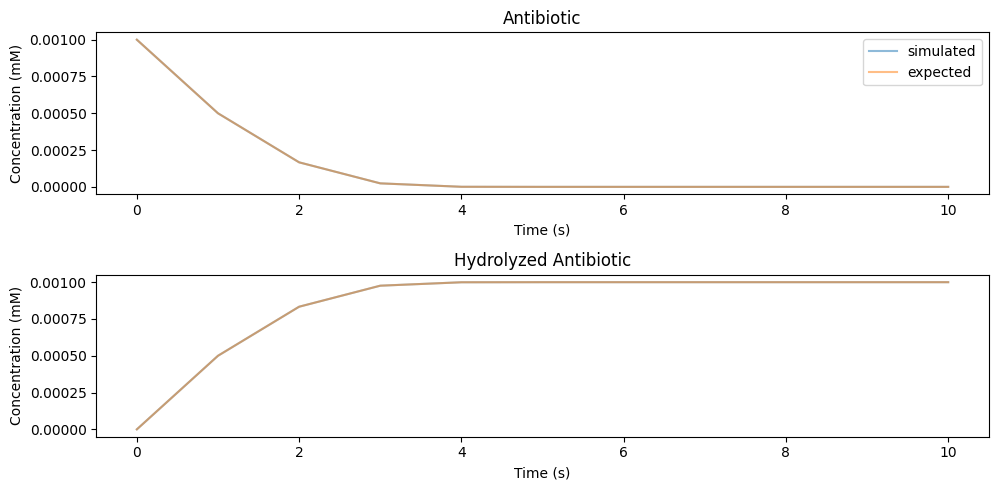

In [5]:
hydrolysis_expected = antibiotic_hydrolysis.get_expected_demo_data()
antibiotic_hydrolysis.get_demo_vs_expected_plot(hydrolysis_demo_data, hydrolysis_expected)

There is very good agreement between the simulated and expected timeseries.

### Efflux Process

In [6]:
from ecoli.processes.antibiotics import antibiotic_transport

The antibiotic hydrolysis process describes the following reaction:

$$ S_I \leftrightharpoons S_E $$

Let's assume that this follows Michaelis-Menten kinetics:

$$ v = \frac{k_{cat}[E][S_I]}{K_M + [S_I]} $$

By default, we have the following values:

* $K_M = 1 \times 10^{-3}$ mM
* $[E] = 1 \times 10^{-3}$ mM (this is constant)
* $[S_I]_0 = 1 \times 10^{-3}$ mM
* $[S_E]_0 = 0$ mM
* $k_{cat} = 1$ $s^{-1}$

In [7]:
pprint({
    key: val
    for key, val in antibiotic_transport.AntibioticTransport.defaults.items()
    if key in ('Km', 'initial_pump', 'initial_internal_antibiotic', 'kcat', 'initial_external_antibiotic')
})

{'Km': <Quantity(0.001, 'millimole / liter')>,
 'initial_external_antibiotic': 0,
 'initial_internal_antibiotic': 0.001,
 'initial_pump': 0.001,
 'kcat': <Quantity(1, '1 / second')>}


If we simulate the process for 10 seconds, we get behavior that looks about right:


Simulation ID: 71e5bbce-2948-11ec-ac37-94f6d615b5b6
Created: 10/09/2021 at 17:32:46
Completed in 0.016336 seconds


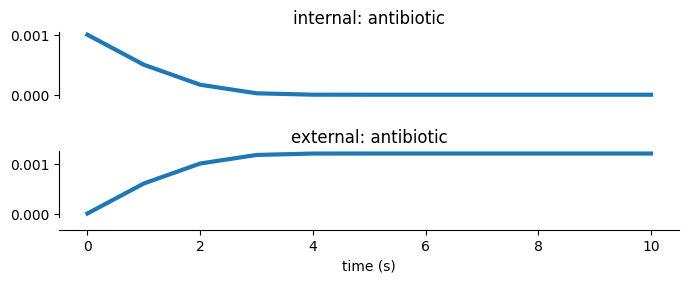

In [8]:
efflux_demo_fig, efflux_demo_data = antibiotic_transport.demo()
efflux_demo_fig

Note that there is an extra step for exported molecules. The efflux process writes the number of molecules to export to the `exchanges` store, and then a second process, `NonSpatialEnvironment`, updates the fields and the transport process's `external` store based on those exchanges. To avoid the 1-timestep lag that this extra step would normally introduce, we make `NonSpatialEnvironment` a `Deriver`.

Here we are using a cell volume of 1.2 fL and an environment volume of 1 fL.

We can compare the simulated results to what we get from doing the Michaelis-Menten calculations directly:

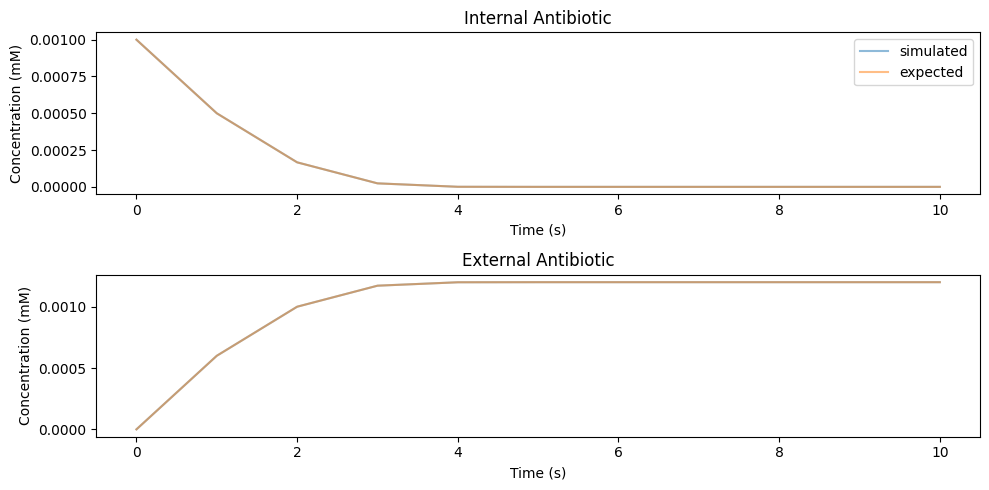

In [9]:
efflux_expected = antibiotic_transport.get_expected_demo_data()
antibiotic_transport.get_demo_vs_expected_plot(efflux_demo_data, efflux_expected)

There is very good agreement between the simulated and expected timeseries.

### Diffusion Process

In [10]:
from ecoli.processes.antibiotics import fickian_diffusion

The diffusion process describes the following reaction:

$$ S_E \leftrightharpoons S_I $$

Let's assume that this follows Fickian diffusion:

$$ rate_{mol} = P \cdot A \cdot m ([S_I] - [S_E]) \Delta t $$

Notice that $rate_{mol}$ has units of moles/sec and is positive when the net flux is out of the cell.

By default, we have the following values:

* $P = 1 \times 10^{-5}$ cm/sec
* $A = 132$ $\frac{cm^2}{mg}$
* $[S_I]_0 = 0$ mM
* $[S_E]_0 = 1 \times 10^{-3}$ mM
* $m = 300$ fg (this is constant)

This equation and $A$ come from:

> Nagano, K., & Nikaido, H. (2009). Kinetic Behavior of the Major Multidrug Efflux Pump AcrB of Escherichia coli. Proceedings of the National Academy of Sciences, 106(14), 5854–5858. https://doi.org/10.1073/pnas.0901695106

The permeability was chosen to make the half-equilibration time 1-10 seconds based on Figure 1 in:

> Nikaido, H. (1989). Outer membrane barrier as a mechanism of antimicrobial resistance. Antimicrobial Agents and Chemotherapy, 33(11), 1831–1836. https://doi.org/10.1128/AAC.33.11.1831

In [11]:
pprint({
    key: val
    for key, val in fickian_diffusion.FickianDiffusion.defaults.items()
    if key in ('permeability', 'surface_area_mass_ratio', 'initial_state',)
})

{'initial_state': {'external': {'antibiotic': 0.001},
                   'global': {'dry_mass': <Quantity(300, 'femtogram')>,
                              'volume': <Quantity(1.2, 'femtoliter')>},
                   'internal': {'antibiotic': 0}},
 'permeability': <Quantity(1e-05, 'centimeter / second')>,
 'surface_area_mass_ratio': <Quantity(132.0, 'centimeter ** 2 / milligram')>}


If we simulate the process for 10 seconds, we get behavior that looks about right:


Simulation ID: 727b3564-2948-11ec-ac37-94f6d615b5b6
Created: 10/09/2021 at 17:32:47
Completed in 0.022952 seconds


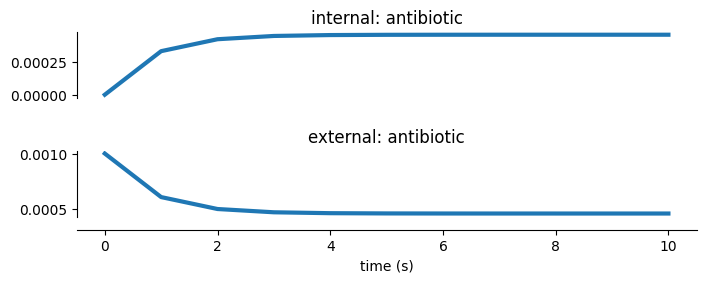

In [12]:
diffusion_demo_fig, diffusion_demo_data = fickian_diffusion.demo()
diffusion_demo_fig

Note that once again, we are using a `NonSpatialEnvironment` with a cell volume of 1.2 fL and an environment volume of 1 fL.

We can compare the simulated results to what we get from the calculations using Fick's Law directly:

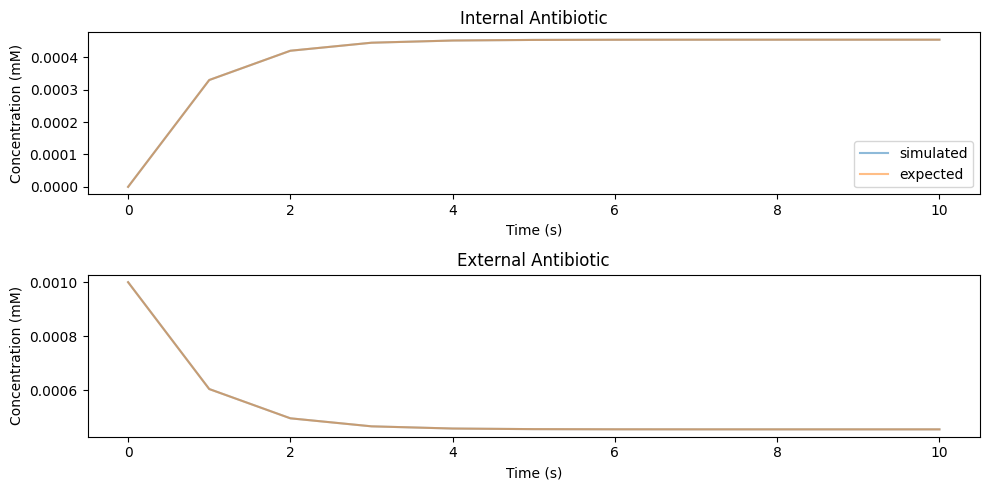

In [13]:
diffusion_expected = fickian_diffusion.get_expected_demo_data()
fickian_diffusion.get_demo_vs_expected_plot(diffusion_demo_data, diffusion_expected)

There is very good agreement between the simulated and expected timeseries. Also notice that the concentrations reach equilibrium at the value we would expect (about $0.5 \times 10^{-3}$ mM because the internal and external volumes are about equal) and do so within 10 seconds, as we expected based on the half-equilibration time.

### Simple Antibiotics Composite

Let's begin with a simple composite of the three processes above. To derive the periplasm volume from the cell volume, we'll also add a shape deriver.

In [22]:
from vivarium.plots.topology import plot_topology
from vivarium.library.units import units
from vivarium.core.composition import composite_in_experiment, simulate_experiment

from ecoli.composites.antibiotics_simple import SimpleAntibioticsCell, INITIAL_EXTERNAL_ANTIBIOTIC
from ecoli.processes.antibiotics.nonspatial_environment import NonSpatialEnvironment

def examine_simple_composite():
    composer = SimpleAntibioticsCell()
    composite = composer.generate()

    plot_settings = {
        'dashed_edges': True,
        'graph_format': 'hierarchy',
        'node_distance': 5,
        'font_size': 10,
        'node_labels': {
            'fickian_diffusion': 'diffusion',
            'shape_deriver': 'shape',
        },
        'coordinates': {
            'external': (0, 4),
            'fluxes': (1, 4),
            'periplasm': (2, 4),
            'global': (3, 4),
            'exchanges': (4, 4),

            'periplasm\nconcs': (1.5, 3),
            'periplasm\nglobal': (2.5, 3),


            'efflux': (0.5, 0),
            'hydrolysis': (1.5, 0),
            'fickian_diffusion': (2.5, 0),
            'shape_deriver': (3.5, 0),
        }
    }
    topology_fig = plot_topology(composite, plot_settings)

    initial_state = composite.initial_state()
    return topology_fig, initial_state

simple_composite_topology_fig, simple_composite_initial = examine_simple_composite()

Here's a diagram of the topology:

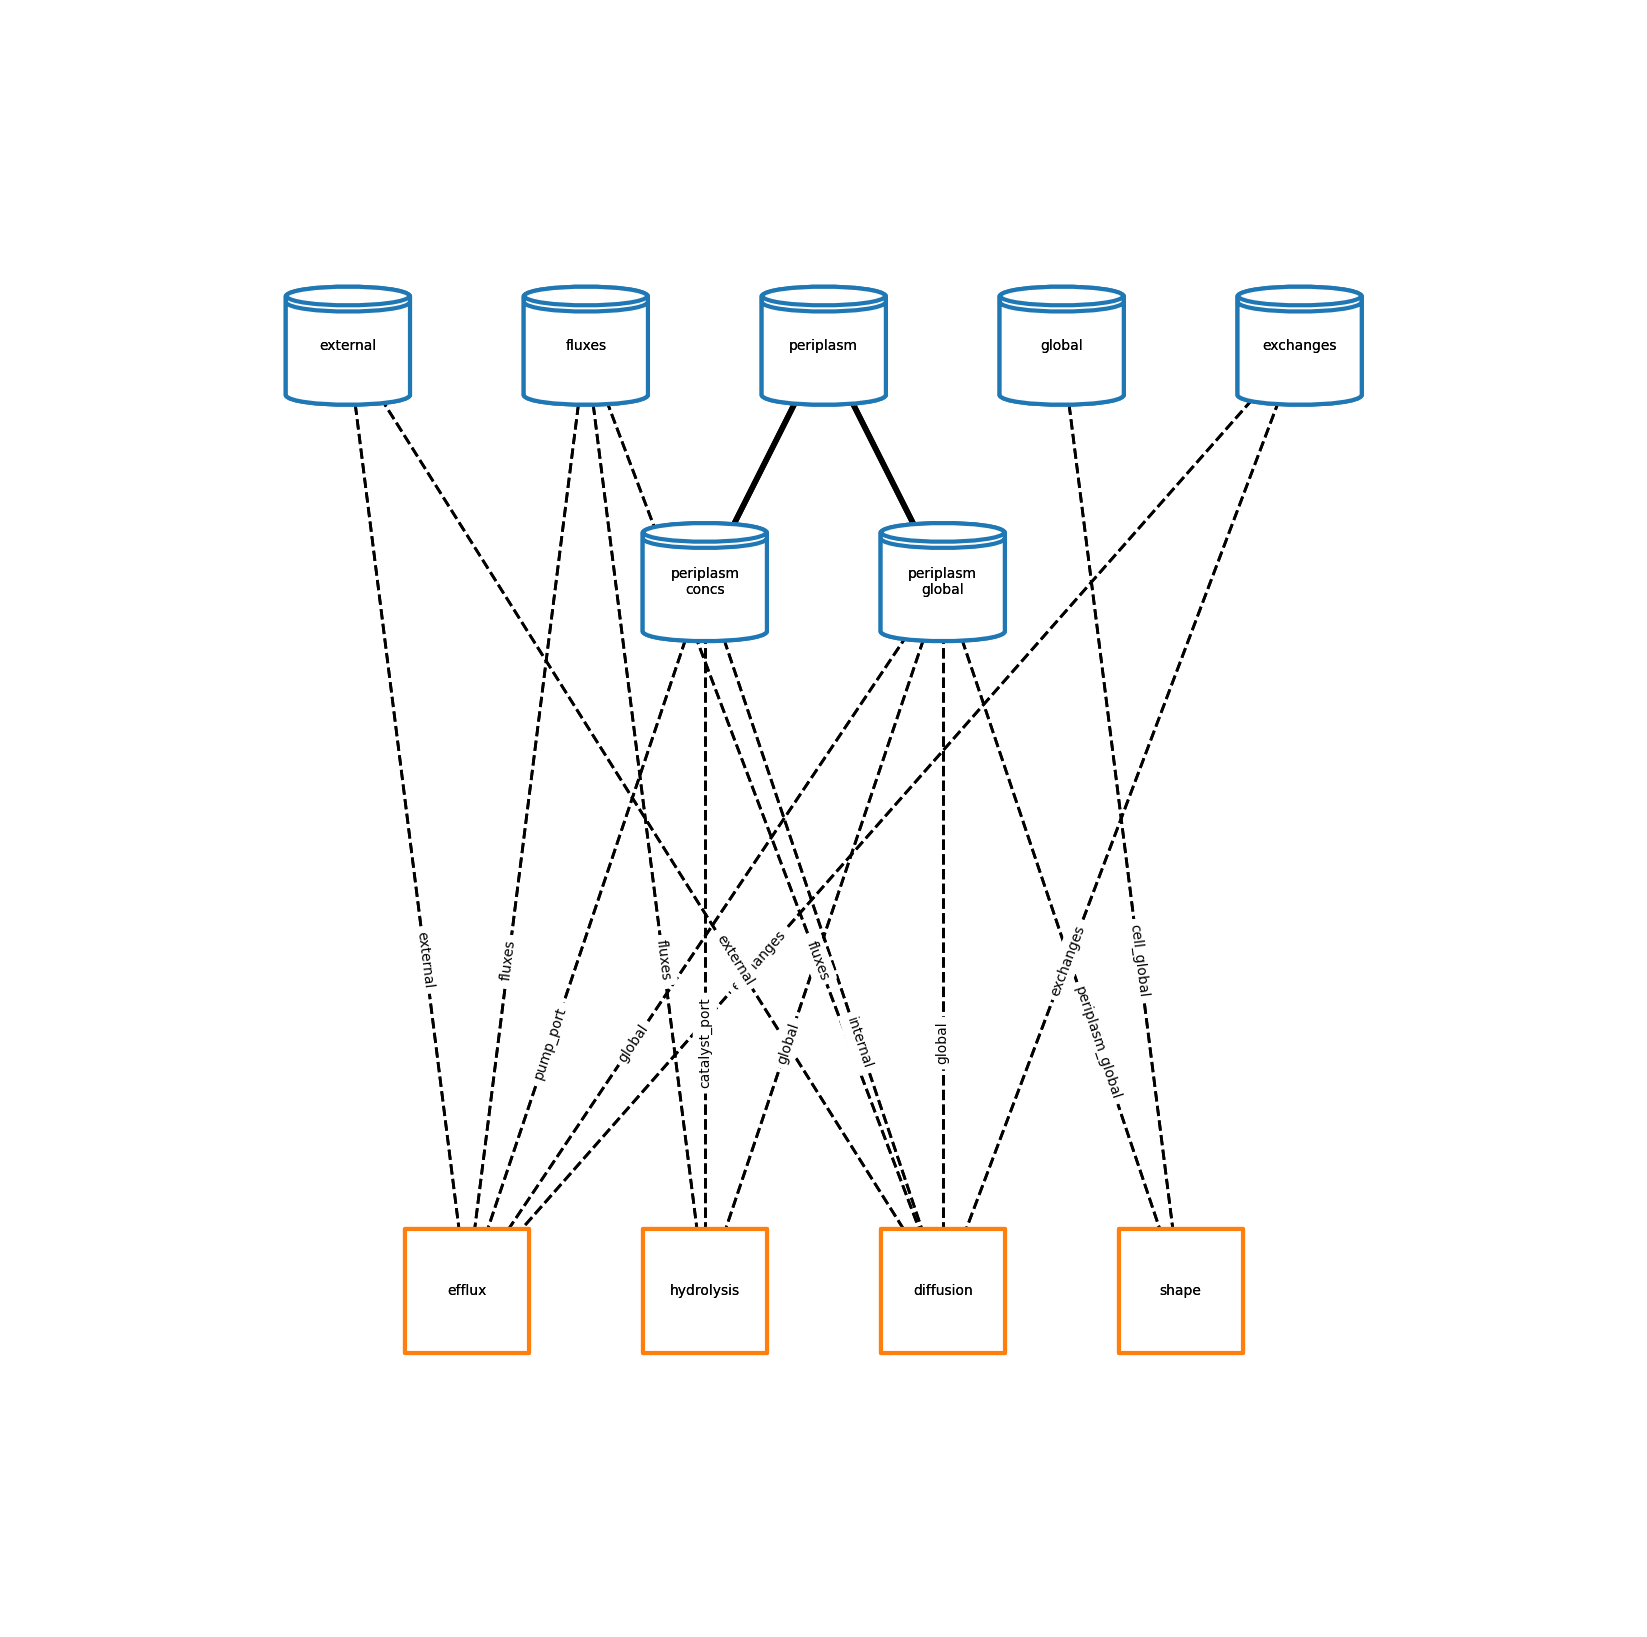

In [23]:
simple_composite_topology_fig

Further, here's the initial state:

In [16]:
pprint(simple_composite_initial)

{'exchanges': {'antibiotic': 0},
 'external': {'antibiotic': 0.001},
 'fluxes': {'antibiotic': 0, 'export': 0.0, 'hydrolysis': 0.0},
 'global': {'volume': <Quantity(1.2, 'femtoliter')>},
 'periplasm': {'concs': {'antibiotic': 0,
                         'antibiotic_hydrolyzed': 0,
                         'beta-lactamase': 0.001,
                         'pump': 0.001},
               'global': {'dry_mass': <Quantity(300, 'femtogram')>,
                          'volume': <Quantity(0.36, 'femtoliter')>}}}


Now let's run a some simulations to see the effects of each process:


Simulation ID: 738c7e18-2948-11ec-ac37-94f6d615b5b6
Created: 10/09/2021 at 17:32:49
Completed in 0.185846 seconds

Simulation ID: 73aabde2-2948-11ec-ac37-94f6d615b5b6
Created: 10/09/2021 at 17:32:49
Completed in 0.180382 seconds

Simulation ID: 73c7daf8-2948-11ec-ac37-94f6d615b5b6
Created: 10/09/2021 at 17:32:49
Completed in 0.247089 seconds


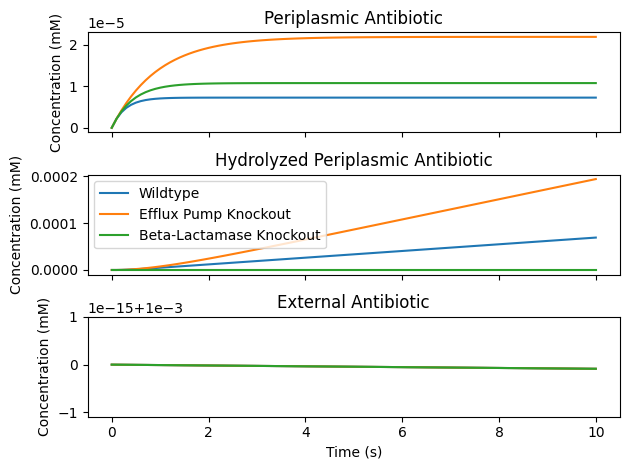

In [17]:
def simulate_simple_composite(config=None):
    config = config or {}
    composite = SimpleAntibioticsCell(config).generate()
    env = NonSpatialEnvironment({
        'concentrations': {
            'antibiotic': INITIAL_EXTERNAL_ANTIBIOTIC,
        },
        'internal_volume': 1.2 * units.fL,
        'env_volume': 1 * units.mL,
    })
    composite.merge(
        composite=env.generate(),
        topology={
            'nonspatial_environment': {
                'external': ('external',),
                'exchanges': ('exchanges',),
                'fields': ('environment', 'fields'),
                'dimensions': ('environment', 'dimensions'),
                'global': ('global',),
            }
        }
    )

    exp = composite_in_experiment(
        composite,
        initial_state=composite.initial_state(),
    )
    data = simulate_experiment(exp, {'total_time': 10})
    return data

def simulate_simple_composite_knockouts():
    data_wt = simulate_simple_composite()
    data_efflux_ko = simulate_simple_composite({
        'efflux': {
            'initial_pump': 0,
        }
    })
    data_beta_lactamase_ko = simulate_simple_composite({
        'hydrolysis': {
            'initial_catalyst': 0,
        }
    })
    assert data_wt['time'] == data_efflux_ko['time'] == data_beta_lactamase_ko['time']
    time = data_wt['time']
    
    datasets = {
        'Wildtype': data_wt,
        'Efflux Pump Knockout': data_efflux_ko,
        'Beta-Lactamase Knockout': data_beta_lactamase_ko,
    }
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True)
    
    for label, data in datasets.items():
        ax1.plot(time, data['periplasm']['concs']['antibiotic'], label=label)
        ax2.plot(time, data['periplasm']['concs']['antibiotic_hydrolyzed'], label=label)
        ax3.plot(time, data['external']['antibiotic'], label=label)
        
    ax1.set_title('Periplasmic Antibiotic')
    ax2.set_title('Hydrolyzed Periplasmic Antibiotic')
    ax3.set_title('External Antibiotic')

    ax3.set_xlabel('Time (s)')
    ax1.set_ylabel('Concentration (mM)')
    ax2.set_ylabel('Concentration (mM)')
    ax3.set_ylabel('Concentration (mM)')
    
    ax2.legend()
        
    fig.tight_layout()
        
    return fig
    
    
simulate_simple_composite_knockouts()